In [ ]:
#This notebook is used to reproduce the findings in this paper: https://www.sciencedirect.com/science/article/pii/S2352914821000356
#Elujide, Israel, et al. "Application of deep and machine learning techniques for multi-label classification performance on psychotic disorder diseases." Informatics in Medicine Unlocked 23 (2021): 100545.

#This paper doesn't provide any code repo

#The libraries include torch, pandas, numpy, matplotlib, imbalanced-learn and sklearn.

#Data can be downloaded from this paper's supplementary material:
#https://www.sciencedirect.com/science/article/pii/S2352340917303487

#Preprocessing code: 0. SMOTE.ipynb

#Imbalanced dataset training and validation: 1_imbalanced data_train+eval.ipynb

#Balanced dataset training and validation: 2_balanced data_train+eval.ipynb

#Pretrained model: see .pt files

In [16]:
#!pip install plotnine
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import torch
from imblearn.over_sampling import SMOTE

In [3]:
!ls

data.csv  sample_data


In [17]:
raw_path = "./data.csv"
data = pd.read_csv(raw_path, encoding = "ISO-8859-1")

In [18]:
data

,sex,age,faNoily_status,religion,occupation,genetic,status,loss_of_parent,divorse,Injury,Spiritual_consult,Insominia,shizopherania,vascula_demetia,MBD,Bipolar,agecode
0,M,18,Yes,C,STUDENT,Yes,S,Yes,No,No,Yes,N,P ø¬>,P,P,N,1
1,F,30,Yes,M,ARTISAN,Yes,S,Yes,No,Yes,Yes,P,P,P ­>,N,N,1
2,M,22,Yes,C,STUDENT,No,S,No,No,No,Yes,P,P,P ­>,N,P,1
3,M,35,No,M,ARTISAN,No,M,No,No,No,Yes,P,P,N ­>,N,P,2
4,M,30,Yes,M,ARTISAN,Yes,M,No,No,No,Yes,P,P,P,P,P,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,F,73,Yes,M,RETIRED,Yes,S,Yes,No,No,Yes,P,N,P,N,P,3
496,F,50,No,M,ARTISAN,No,M,Yes,No,No,No,P,P,N,P,P,2
497,F,32,No,C,FORCE,No,M,No,No,No,Yes,N,P,P,P,N,2
498,M,13,Yes,C,STUDENT,No,S,Yes,No,No,No,N,P,N,N,N,1


In [19]:
data.columns

Index(['sex', 'age', 'faNoily_status', 'religion', 'occupation', 'genetic',
       'status', 'loss_of_parent', 'divorse', 'Injury', 'Spiritual_consult',
       'Insominia', 'shizopherania', 'vascula_demetia', 'MBD', 'Bipolar',
       'agecode'],
      dtype='object')

In [20]:
def convert_number(symbol):
  if "P" in symbol:
    symbol = str(1)
  else:
    symbol = str(0)
  return symbol

In [21]:
for i in range(len(data)):
  data.at[i, "Insominia"] = convert_number(data.at[i, "Insominia"])
  data.at[i, "shizopherania"] = convert_number(data.at[i, "shizopherania"])
  data.at[i, "vascula_demetia"] = convert_number(data.at[i, "vascula_demetia"])
  data.at[i, "MBD"] = convert_number(data.at[i, "MBD"])
  data.at[i, "Bipolar"] = convert_number(data.at[i, "Bipolar"])
  
data.rename(columns={"MBD": "ADHD"}, inplace = True)

In [133]:
X = data.loc[:,['sex', 'agecode', 'faNoily_status', 'religion', 'occupation', 'genetic',	
         'status',	'loss_of_parent',	'divorse',	'Injury', 'Spiritual_consult']]
Y = data.loc[:,['Insominia', 'shizopherania', 'vascula_demetia', 'ADHD',	'Bipolar']]
print(X.shape, Y.shape)

(500, 11) (500, 5)


In [134]:
X_ohe = pd.get_dummies(X)
print(X_ohe.shape)

(500, 26)


In [135]:
Y

,Insominia,shizopherania,vascula_demetia,ADHD,Bipolar
0,0,1,1,1,0
1,1,1,1,0,0
2,1,1,1,0,1
3,1,1,0,0,1
4,1,1,1,1,1
...,...,...,...,...,...
495,1,0,1,0,1
496,1,1,0,1,1
497,0,1,1,1,0
498,0,1,0,0,0


In [78]:
data_imbalanced = pd.concat([X_ohe, Y], axis = 1)
print(data_imbalanced)
data_imbalanced.to_csv('./data_imbalanced.csv')

     agecode  sex_F  sex_M  faNoily_status_No  faNoily_status_Yes  religion_C  \
0          1      0      1                  0                   1           1   
1          1      1      0                  0                   1           0   
2          1      0      1                  0                   1           1   
3          2      0      1                  1                   0           0   
4          1      0      1                  0                   1           0   
..       ...    ...    ...                ...                 ...         ...   
495        3      1      0                  0                   1           0   
496        2      1      0                  1                   0           0   
497        2      1      0                  1                   0           1   
498        1      0      1                  0                   1           1   
499        1      1      0                  0                   1           0   

     religion_M  religion_O

In [136]:
Y["target"] = Y["Insominia"] + Y["shizopherania"] + Y["vascula_demetia"] + Y["ADHD"] + Y["Bipolar"]

(array([103.,  93., 129.,  44.,  19.,  13.,  14.,  12.,  70.,   3.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

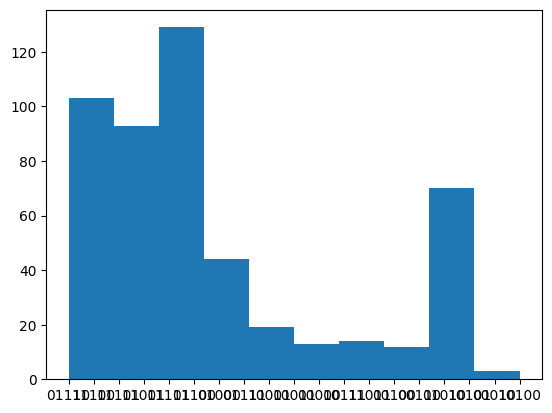

In [137]:
from matplotlib import pyplot as plt
plt.hist(Y["target"])

In [138]:
from collections import Counter
count = dict(Counter(Y["target"]))
print(count)

{'01110': 101, '11100': 2, '11101': 72, '11001': 21, '11111': 48, '01100': 81, '01000': 43, '01111': 1, '10001': 19, '10011': 3, '00000': 10, '10111': 5, '11011': 9, '00100': 10, '00110': 2, '01010': 47, '10101': 23, '00010': 2, '10100': 1}


In [139]:
#40.2% tested positive to bipolar disorder, 40.6% to insomnia, 75% (actually 85%) to schizophrenia, 43.6% to ADHD and 69.2% to vascular dementia

In [140]:
for k in list(count.keys()):
     if count[k] <7:
       print(k)
       del count[k]

print(count)


11100
01111
10011
10111
00110
00010
10100
{'01110': 101, '11101': 72, '11001': 21, '11111': 48, '01100': 81, '01000': 43, '10001': 19, '00000': 10, '11011': 9, '00100': 10, '01010': 47, '10101': 23}


In [141]:
Y = Y[Y['target'].isin(count.keys())]

rows_kept = Y.index
X_ohe = X_ohe.iloc[rows_kept]
print(X_ohe)

     agecode  sex_F  sex_M  faNoily_status_No  faNoily_status_Yes  religion_C  \
0          1      0      1                  0                   1           1   
2          1      0      1                  0                   1           1   
3          2      0      1                  1                   0           0   
4          1      0      1                  0                   1           0   
5          3      1      0                  0                   1           1   
..       ...    ...    ...                ...                 ...         ...   
495        3      1      0                  0                   1           0   
496        2      1      0                  1                   0           0   
497        2      1      0                  1                   0           1   
498        1      0      1                  0                   1           1   
499        1      1      0                  0                   1           0   

     religion_M  religion_O

In [142]:
data_balanced = pd.concat([X_ohe, Y], axis = 1)

In [143]:
print(data_balanced)

     agecode  sex_F  sex_M  faNoily_status_No  faNoily_status_Yes  religion_C  \
0          1      0      1                  0                   1           1   
2          1      0      1                  0                   1           1   
3          2      0      1                  1                   0           0   
4          1      0      1                  0                   1           0   
5          3      1      0                  0                   1           1   
..       ...    ...    ...                ...                 ...         ...   
495        3      1      0                  0                   1           0   
496        2      1      0                  1                   0           0   
497        2      1      0                  1                   0           1   
498        1      0      1                  0                   1           1   
499        1      1      0                  0                   1           0   

     religion_M  religion_O

In [144]:
data_balanced.reset_index(inplace=True)

for i in range(len(data_balanced)):
  data_balanced.at[i, 'ohe'] = list(count.keys()).index(data_balanced.at[i,'target'])

In [145]:
data_balanced

,index,agecode,sex_F,sex_M,faNoily_status_No,faNoily_status_Yes,religion_C,religion_M,religion_O,occupation_ARTISAN,...,Injury_Yes,Spiritual_consult_No,Spiritual_consult_Yes,Insominia,shizopherania,vascula_demetia,ADHD,Bipolar,target,ohe
0,0,1,0,1,0,1,1,0,0,0,...,0,0,1,0,1,1,1,0,01110,0.0
1,2,1,0,1,0,1,1,0,0,0,...,0,0,1,1,1,1,0,1,11101,1.0
2,3,2,0,1,1,0,0,1,0,1,...,0,0,1,1,1,0,0,1,11001,2.0
3,4,1,0,1,0,1,0,1,0,1,...,0,0,1,1,1,1,1,1,11111,3.0
4,5,3,1,0,0,1,1,0,0,0,...,0,0,1,0,1,1,0,0,01100,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,495,3,1,0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,1,10101,11.0
480,496,2,1,0,1,0,0,1,0,1,...,0,1,0,1,1,0,1,1,11011,8.0
481,497,2,1,0,1,0,1,0,0,0,...,0,0,1,0,1,1,1,0,01110,0.0
482,498,1,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,0,0,01000,5.0


In [156]:
#generate balanced dataset
x_ = data_balanced[X_ohe.columns]
y_ = data_balanced['ohe']

In [157]:
oversample = SMOTE()
x1_, y1_ = oversample.fit_resample(x_, y_)

print(x1_, y1_)

      agecode  sex_F  sex_M  faNoily_status_No  faNoily_status_Yes  \
0           1      0      1                  0                   1   
1           1      0      1                  0                   1   
2           2      0      1                  1                   0   
3           1      0      1                  0                   1   
4           3      1      0                  0                   1   
...       ...    ...    ...                ...                 ...   
1207        3      0      1                  0                   0   
1208        3      0      1                  0                   1   
1209        3      0      1                  0                   0   
1210        3      0      1                  0                   0   
1211        3      1      0                  0                   1   

      religion_C  religion_M  religion_O  occupation_ARTISAN  \
0              1           0           0                   0   
1              1           0   

In [164]:
data_balanced_1 = pd.concat([x1_, y1_], axis = 1)

for i in range(len(data_balanced_1)):
  data_balanced_1.at[i, 'target'] = list(count.keys())[int(data_balanced_1.at[i, 'ohe'])]

In [170]:
data_balanced_1['Insominia'] = data_balanced_1['target'].str[0]
data_balanced_1["shizopherania"] = data_balanced_1['target'].str[1]
data_balanced_1["vascula_demetia"] = data_balanced_1['target'].str[2]
data_balanced_1["ADHD"] = data_balanced_1['target'].str[3]
data_balanced_1["Bipolar"] = data_balanced_1['target'].str[4]

In [176]:
count_balanced = dict(Counter(data_balanced_1['target']))
print(count_balanced)


{'01110': 101, '11101': 101, '11001': 101, '11111': 101, '01100': 101, '01000': 101, '10001': 101, '00000': 101, '11011': 101, '00100': 101, '01010': 101, '10101': 101}


In [177]:
data_balanced_1 = data_balanced_1.drop(["ohe", "target"], axis=1)
data_balanced_1

,agecode,sex_F,sex_M,faNoily_status_No,faNoily_status_Yes,religion_C,religion_M,religion_O,occupation_ARTISAN,occupation_C/SERVANT,...,divorse_Yes,Injury_No,Injury_Yes,Spiritual_consult_No,Spiritual_consult_Yes,Insominia,shizopherania,vascula_demetia,ADHD,Bipolar
0,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,1,1,0
1,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,1,1,1,1,0,1
2,2,0,1,1,0,0,1,0,1,0,...,0,1,0,0,1,1,1,0,0,1
3,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,1,1,1,1,1
4,3,1,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,3,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1
1208,3,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
1209,3,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,1,0,1
1210,3,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1


In [179]:
data_balanced_1.to_csv('./data_balanced.csv')